In [1]:
from dasquakes import *
import datetime
import numpy as np

# 1. Choose the following parameters to select data to examine

In [2]:
cable='seadasn'
record_length = 10 #minutes
#at night
#t0 = datetime.datetime(2022, 11, 10, 10, 41, 0) #2am local hours
t0 = datetime.datetime(2022, 11, 23, 23, 41, 0) #2am local hours

# 2. Run the functions to return the data

In [3]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [4]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 60000, Number of channels: 4555
Nyquist Frequency: 50.0 Hz, cable length: 29065.238805136032 m


# 4. Make a simple plot of the data

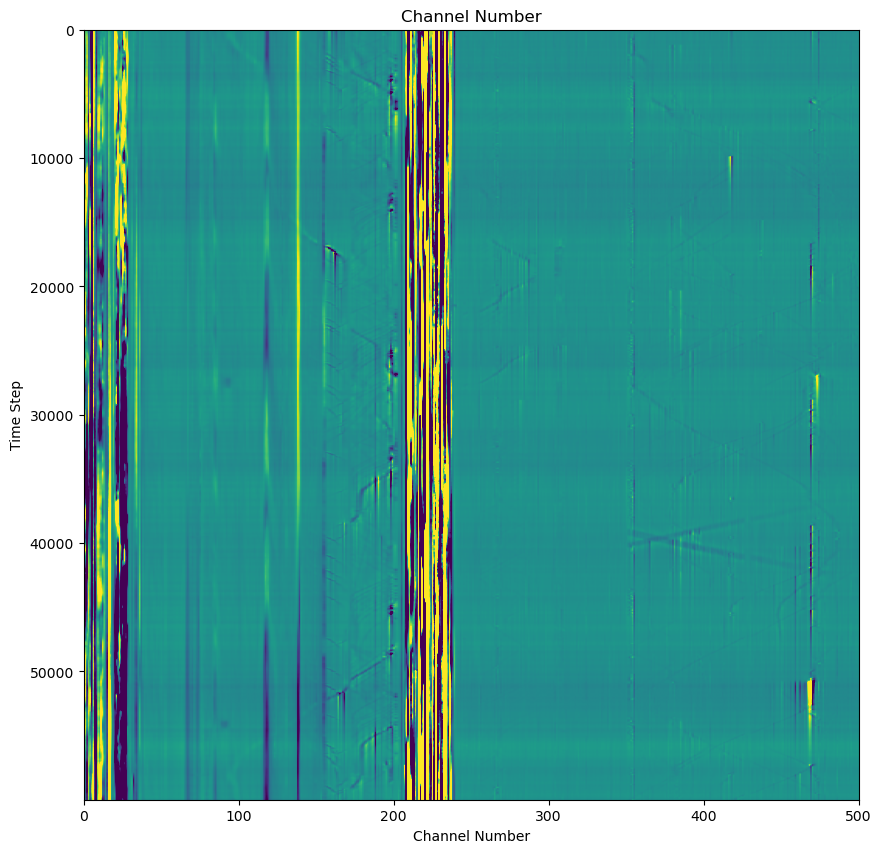

In [5]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(data,aspect='auto',vmin=-10,vmax=10)
plt.title('Channel Number')
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim([0,500])
plt.show()

# 4. We are going to analyze the channels betweenn 150 and 200 


# Data filter

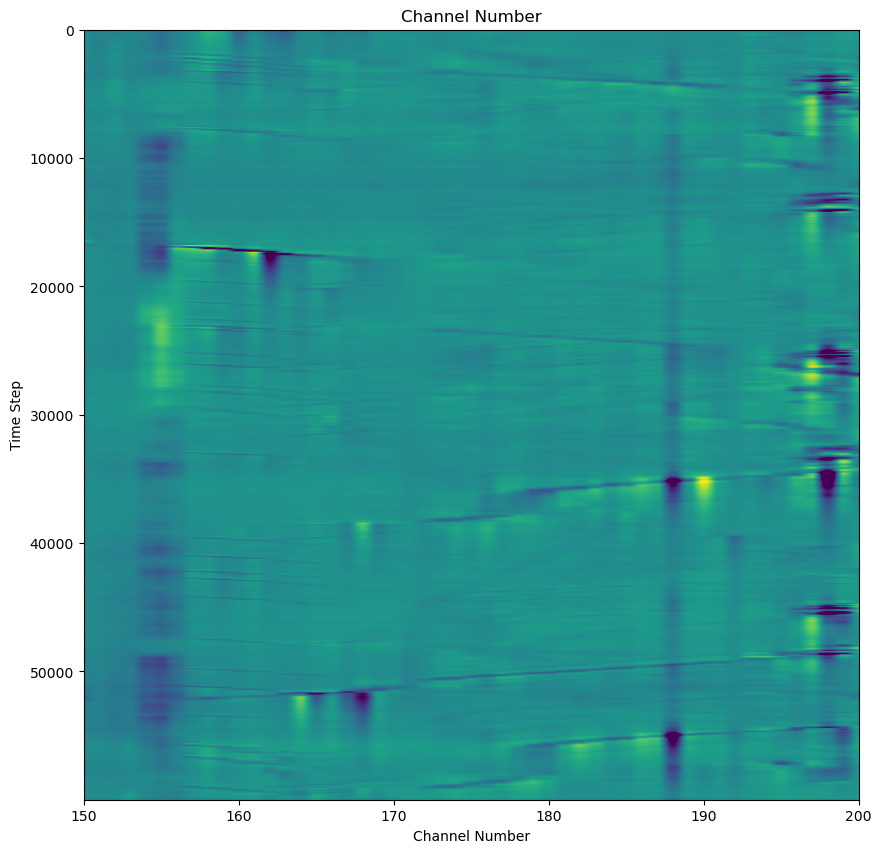

In [6]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(data,aspect='auto',vmin=-10,vmax=10)
plt.title('Channel Number')
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim([150,200])
plt.show()

In [7]:
#pass band
from scipy.signal import butter, filtfilt
#defining outputs
b,a = butter(2,[10,30],'bandpass',fs=attrs['MaximumFrequency']*2)
datafilter=filtfilt(b,a,data[::20,:],axis=0)


# Plot Filter

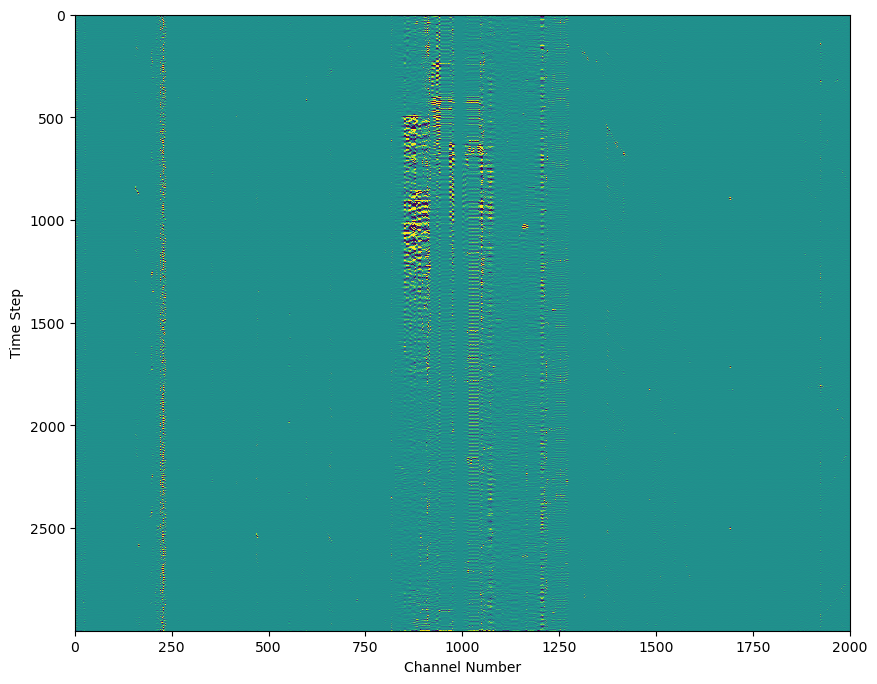

In [8]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
plt.imshow(datafilter, aspect='auto', vmin=-0.5, vmax=0.5)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim([0,2000])
plt.show()
#plt.colorbar()

# zoom for one parabole

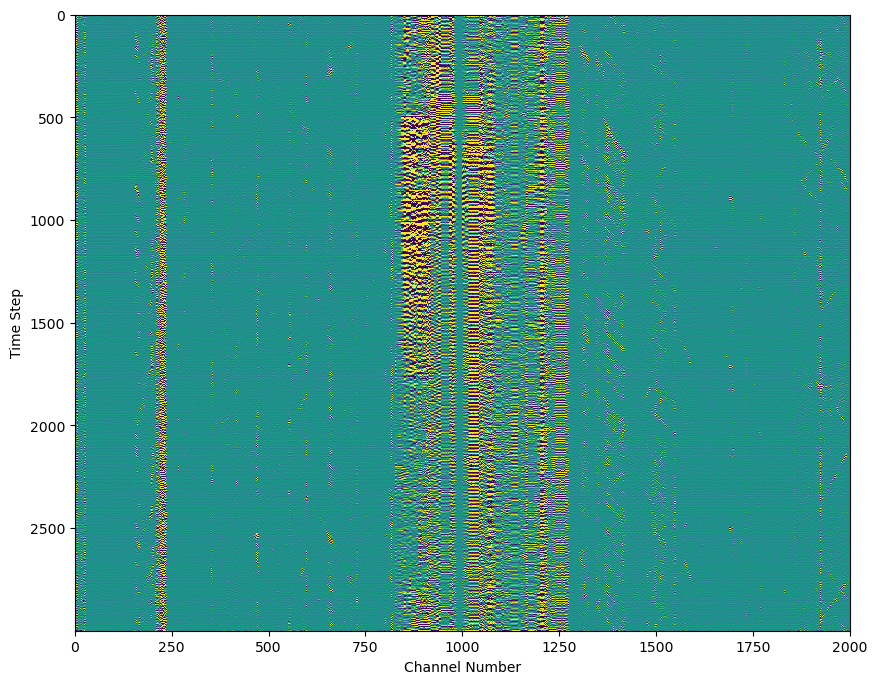

In [9]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
plt.imshow(datafilter, aspect='auto', vmin=-0.1, vmax=0.1)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim([0,2000])
#plt.ylim([7800, 9000])
plt.show()
#plt.colorbar()

# Marathon day


In [10]:
cable='seadasn'
record_length = 10 #minutes
t0 = datetime.datetime(2022, 11, 25, 23, 30, 0)
#no record this day

In [11]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

In [12]:
nt = data.shape[0]
nx = data.shape[1]
print(f'Number of time steps: {nt}, Number of channels: {nx}')

print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

Number of time steps: 60000, Number of channels: 4555
Nyquist Frequency: 50.0 Hz, cable length: 29065.238805136032 m


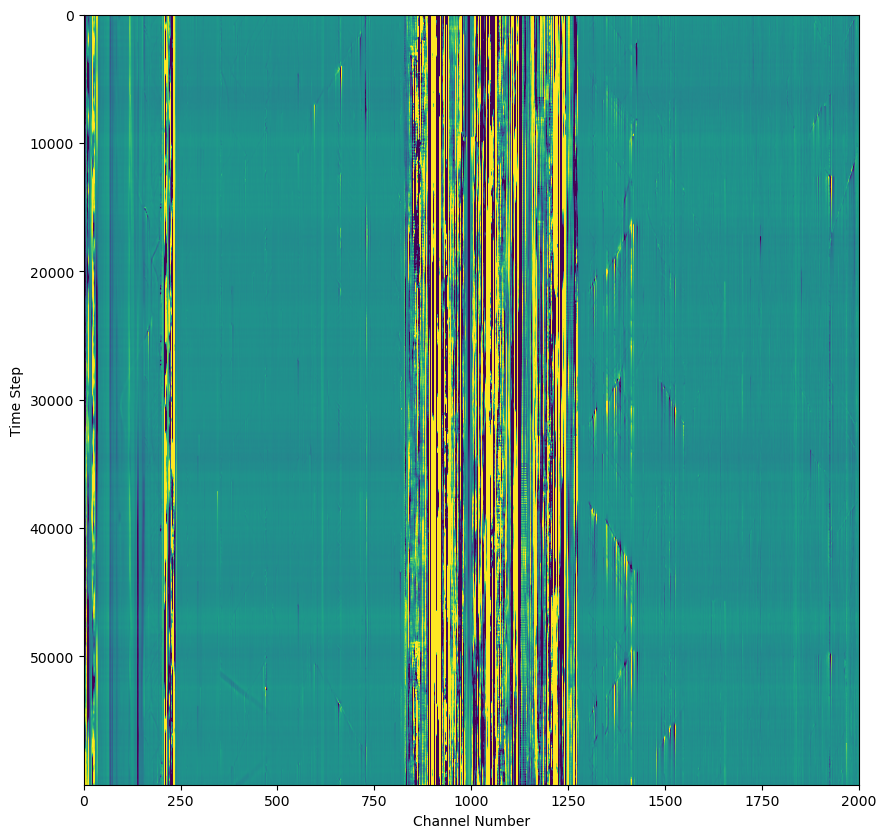

In [13]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(data,aspect='auto',vmin=-10,vmax=10)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.xlim([0,2000])
plt.show()
#plt.colorbar()

In [14]:
#pass band
from scipy.signal import butter, filtfilt
#defining outputs
c,d = butter(2,[10,30],'bandpass',fs=attrs['MaximumFrequency']*2)
datafilter2=filtfilt(c,d,data[::20,:],axis=0)


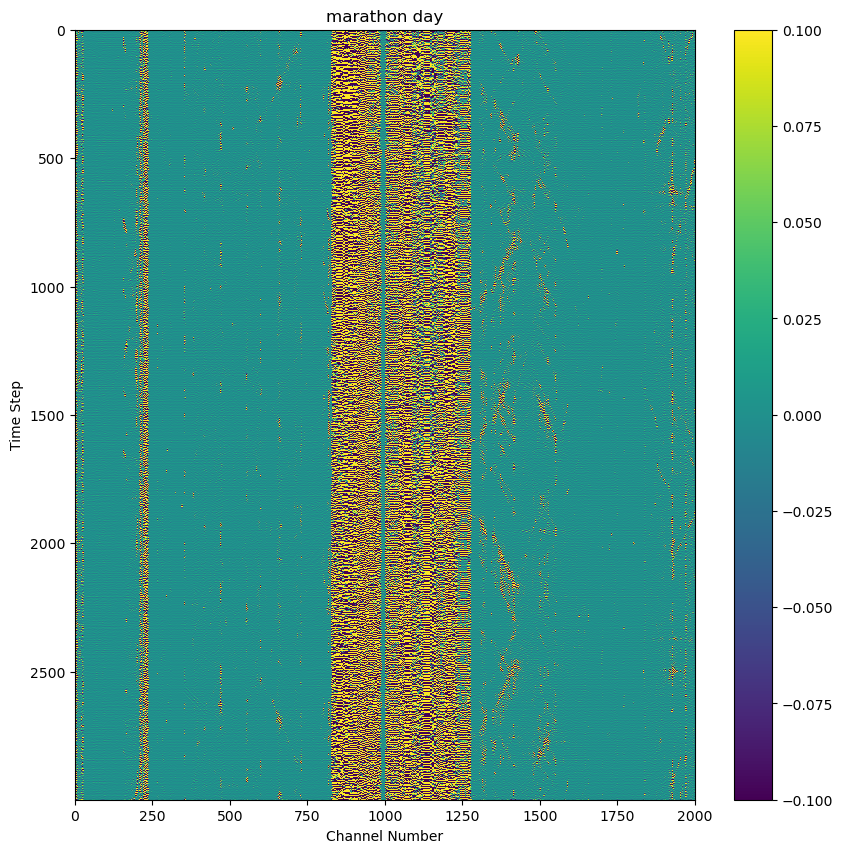

In [15]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
plt.imshow(datafilter2, aspect='auto', vmin=-0.1, vmax=0.1)
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.title('marathon day')
plt.xlim([0,2000])
#plt.ylim([7800, 9000])
plt.colorbar()
plt.show()
